# File used for data analysis and visualization

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations

## Load data and save descriptive stats

In [48]:
# Read the CSV into a DataFrame
ccx_2 = pd.read_csv('Results/Raw/ccx_2_results.csv')
ccx_3 = pd.read_csv('Results/Raw/ccx_3_results.csv')
ccx_custom = pd.read_csv('Results/Raw/ccx_custom_results.csv')

non_ccx_2 = pd.read_csv('Results/Raw/non_ccx_2_results.csv')
non_ccx_3 = pd.read_csv('Results/Raw/non_ccx_3_results.csv')
non_ccx_custom = pd.read_csv('Results/Raw/non_ccx_custom_results.csv')

non_ccx_random_2 = pd.read_csv('Results/Raw/random_results_2_non_ccx.csv')
non_ccx_random_3 = pd.read_csv('Results/Raw/random_results_3_non_ccx.csv')
non_ccx_random_custom = pd.read_csv('Results/Raw/random_results_custom_non_ccx.csv')

dfs = [ccx_2, ccx_3, ccx_custom, non_ccx_2, non_ccx_3, non_ccx_custom]

# Save descriptive stats
describe = ccx_2.describe()
describe.to_csv('Results/describe_ccx_2.csv')

ccx_3_describe = ccx_3.describe()
ccx_3_describe.to_csv('Results/describe_ccx_3.csv')

ccx_custom_describe = ccx_custom.describe()
ccx_custom_describe.to_csv('Results/describe_ccx_custom.csv')

non_ccx_2_describe = non_ccx_2.describe()
non_ccx_2_describe.to_csv('Results/describe_non_ccx_2.csv')

non_ccx_3_describe = non_ccx_3.describe()
non_ccx_3_describe.to_csv('Results/describe_non_ccx_3.csv')

non_ccx_custom_describe = non_ccx_custom.describe()
non_ccx_custom_describe.to_csv('Results/describe_non_ccx_custom.csv')

In [49]:
combined_df = pd.concat([ccx_2], ignore_index=True)
# Assuming combined_df is your combined DataFrame

# Select the columns of interest
selected_columns = ['L2_Time', 'L3_Time', 'TLC_Time']
selected_df = combined_df[selected_columns]

# Display the describe() statistics
description = selected_df.describe()

# Print or display the result
print(description)


        L2_Time   L3_Time  TLC_Time
count  1.48e+03  1.48e+03   1476.00
mean   1.31e-03  6.44e-03      0.08
std    1.44e-04  2.22e-03      0.02
min    1.01e-03  4.87e-03      0.05
25%    1.20e-03  5.94e-03      0.06
50%    1.29e-03  6.22e-03      0.07
75%    1.37e-03  6.53e-03      0.09
max    1.87e-03  5.49e-02      0.15


In [50]:
non_ccx_3.describe()['L3_Layers']

count    4332.00
mean        3.88
std         0.96
min         0.00
25%         3.00
50%         4.00
75%         5.00
max         5.00
Name: L3_Layers, dtype: float64

## Get Template Matched Numbers

In [51]:
ccx_2['Template_Matched'].value_counts()
936 / 1476

0.6341463414634146

In [52]:
ccx_3['Template_Matched'].value_counts()
288/1476

0.1951219512195122

In [53]:
ccx_custom['Template_Matched'].value_counts()
420/1476

0.2845528455284553

## Create Compare File

In [54]:
# Extract the relevant columns from describe for ccx_2
ccx_2_describe = ccx_2.describe()[['L2_Cost', 'L3_Cost', 'TLC_Cost']]
ccx_2_describe.columns = ['L2_Cost', 'L3_Cost', 'TLC_Cost_2']

# Extract the relevant columns from describe for ccx_3
ccx_3_describe = ccx_3.describe()[['TLC_Cost']]
ccx_3_describe.columns = ['TLC_Cost_3']

# Extract the relevant columns from describe for ccx_custom
ccx_custom_describe = ccx_custom.describe()[['TLC_Cost']]
ccx_custom_describe.columns = ['TLC_Cost_Custom']

# Combine the DataFrames
combined_df = pd.concat([ccx_2_describe, ccx_3_describe, ccx_custom_describe], axis=1)

# Print the combined DataFrame
print(combined_df)

combined_df.to_csv('Results/compare_ccx.csv')

       L2_Cost  L3_Cost  TLC_Cost_2  TLC_Cost_3  TLC_Cost_Custom
count  1476.00  1476.00     1476.00     1476.00          1476.00
mean     30.72    29.30       27.66       28.21            28.36
std       5.51     5.55        5.48        5.51             5.54
min      25.00    21.00       21.00       21.00            19.00
25%      28.00    26.00       25.00       25.00            26.00
50%      30.00    29.00       27.00       27.00            27.00
75%      31.00    30.00       28.00       29.00            29.00
max      50.00    49.00       48.00       49.00            49.00


In [55]:
# Extract the relevant columns from describe for ccx_2
non_ccx_2_describe = non_ccx_2.describe()[['L2_Cost', 'L3_Cost', 'TLC_Cost']]
non_ccx_2_describe.columns = ['L2_Cost', 'L3_Cost', 'TLC_Cost_2']

# Extract the relevant columns from describe for ccx_3
non_ccx_3_describe = non_ccx_3.describe()[['TLC_Cost']]
non_ccx_3_describe.columns = ['TLC_Cost_3']

# Extract the relevant columns from describe for ccx_custom
non_ccx_custom_describe = non_ccx_custom.describe()[['TLC_Cost']]
non_ccx_custom_describe.columns = ['TLC_Cost_Custom']

# Combine the DataFrames
combined_df = pd.concat([non_ccx_2_describe, non_ccx_3_describe, non_ccx_custom_describe], axis=1)

# Print the combined DataFrame
print(combined_df)
combined_df.to_csv('Results/compare_non_ccx.csv')

       L2_Cost  L3_Cost  TLC_Cost_2  TLC_Cost_3  TLC_Cost_Custom
count  4332.00  4332.00     4332.00     4332.00          4332.00
mean      8.97     8.52        6.94        7.06             6.94
std       2.24     2.43        2.20        2.07             2.20
min       2.00     0.00        0.00        0.00             0.00
25%       7.00     7.00        5.00        6.00             5.00
50%       9.00     9.00        7.00        7.00             7.00
75%      11.00    11.00        9.00        9.00             9.00
max      13.00    13.00       12.00       12.00            12.00


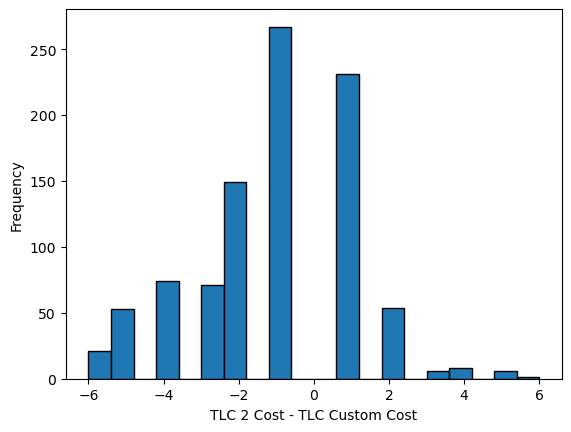

In [56]:
# Calculate the difference between TLC_Cost columns
cost_difference = ccx_2['TLC_Cost'] - ccx_custom['TLC_Cost']

# Filter out zero differences
non_zero_differences = cost_difference[cost_difference != 0]

# Create a histogram
plt.hist(non_zero_differences, bins=20, edgecolor='black')
plt.xlabel('TLC 2 Cost - TLC Custom Cost')
plt.ylabel('Frequency')
plt.show()


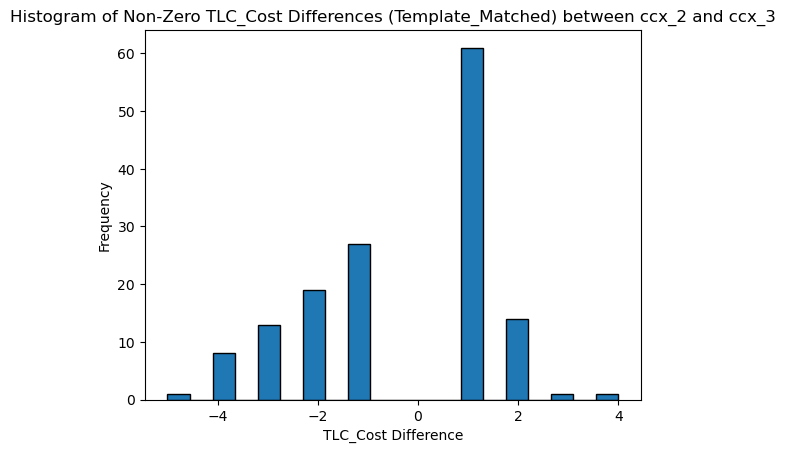

In [57]:
# Filter rows where "Template_Matched" is true for both ccx_2 and ccx_3
matched_rows_ccx_2 = ccx_2[ccx_2['Template_Matched']]
matched_rows_ccx_3 = ccx_3[ccx_3['Template_Matched']]

# Calculate the difference between TLC_Cost columns for matched rows
cost_difference = matched_rows_ccx_2['TLC_Cost'] - matched_rows_ccx_3['TLC_Cost']

# Filter out zero differences
non_zero_differences = cost_difference[cost_difference != 0]

# Create a histogram
plt.hist(non_zero_differences, bins=20, edgecolor='black')
plt.title('Histogram of Non-Zero TLC_Cost Differences (Template_Matched) between ccx_2 and ccx_3')
plt.xlabel('TLC_Cost Difference')
plt.ylabel('Frequency')
plt.show()


## Violin Plots

<Axes: >

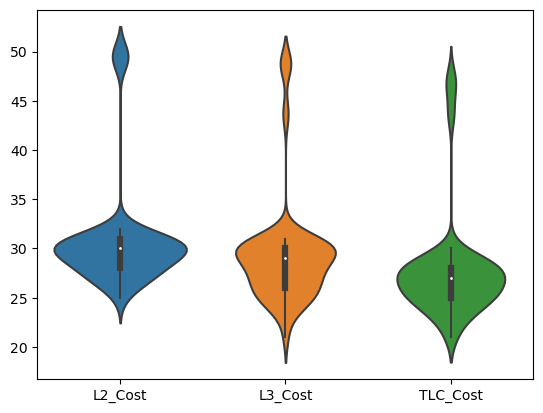

In [58]:
sns.violinplot(data=ccx_2[['L2_Cost', 'L3_Cost', 'TLC_Cost']])

<Axes: >

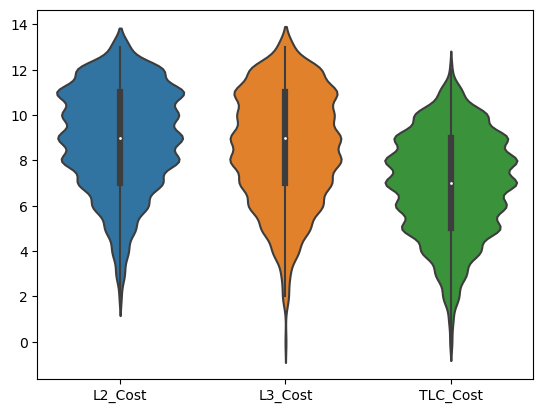

In [59]:
sns.violinplot(data=non_ccx_2[['L2_Cost', 'L3_Cost', 'TLC_Cost']])

In [60]:
new_df = pd.DataFrame()

new_df['None'] = non_ccx_2['Original_Cost']

# Add the 'TLC_Cost' columns from non_ccx_3 and non_ccx_custom
new_df['TLC_2'] = non_ccx_2['Original_Cost'] - non_ccx_2['TLC_Cost']
new_df['TLC_3'] = non_ccx_2['Original_Cost'] -non_ccx_3['TLC_Cost']
new_df['TLC_3(-US)'] = non_ccx_2['Original_Cost'] -non_ccx_custom['TLC_Cost'] 

new_df['L2'] = non_ccx_2['Original_Cost'] -non_ccx_2['L2_Cost']
new_df['L3'] =  non_ccx_2['Original_Cost'] - non_ccx_2['L3_Cost']

In [61]:
new_df = pd.DataFrame()

#new_df['None'] = ccx_2['Original_Layers']

# Add the 'TLC_Cost' columns from non_ccx_3 and non_ccx_custom
new_df['TLC_2'] = ccx_2['Original_Cost'] - ccx_2['TLC_Cost']
new_df['TLC_3'] = ccx_2['Original_Cost'] -ccx_3['TLC_Cost']
new_df['TLC_3(-US)'] = ccx_2['Original_Cost'] -ccx_custom['TLC_Cost'] 

new_df['L2'] = ccx_2['Original_Cost'] -ccx_2['L2_Cost']
new_df['L3'] =  ccx_2['Original_Cost'] - ccx_2['L3_Cost']

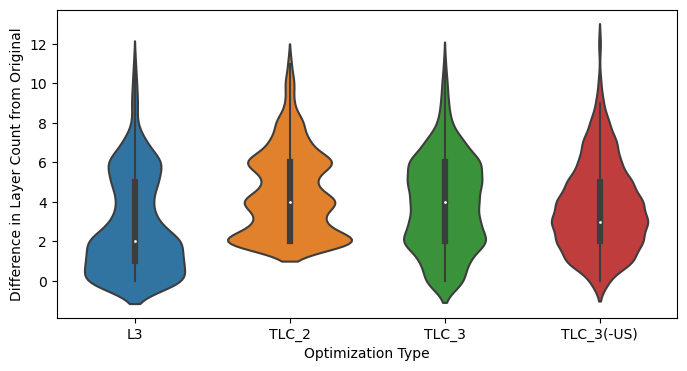

In [62]:

selected_columns = ['L3', 'TLC_2', 'TLC_3', 'TLC_3(-US)']
data_for_violin = new_df[selected_columns]
plt.figure(figsize=(8, 4))

sns.violinplot(data=data_for_violin)

plt.xlabel("Optimization Type")
plt.ylabel("Difference in Layer Count from Original")
plt.show()

## Random Testing

In [63]:
random_2 = pd.read_csv('Results/Random/random_results_2.csv')
random_3 = pd.read_csv('Results/Random/random_results_3.csv')
random_custom = pd.read_csv('Results/Random/random_results_custom.csv')

In [64]:
display(random_2['Template_Matched'].value_counts())
display(random_3['Template_Matched'].value_counts())
display(random_custom['Template_Matched'].value_counts())

Template_Matched
False    657
True     143
Name: count, dtype: int64

Template_Matched
False    738
True      62
Name: count, dtype: int64

Template_Matched
False    737
True      63
Name: count, dtype: int64

In [65]:
random_custom.columns

Index(['Num_Qubits', 'Num_Layers', 'Original_X', 'L2_X', 'L3_X', 'TLC_X',
       'Original_CX', 'L2_CX', 'L3_CX', 'TLC_CX', 'Original_CCX', 'L2_CCX',
       'Original_Layers', 'L2_Layers', 'L3_Layers', 'TLC_Layers', 'L2_Time',
       'L3_Time', 'TLC_Time', 'Original_Cost', 'L2_Cost', 'L3_Cost',
       'TLC_Cost', 'L3_Unitary', 'TLC_Unitary', 'L3_Unitary_X',
       'TLC_Unitary_X', 'L3_Unitary_CX', 'TLC_Unitary_CX', 'L3_Unitary_CCX',
       'TLC_Unitary_CCX', 'Template_Matched', 'Template_Matching_Time',
       'Template_Substitution_Time', 'Optimization_Pass_Time'],
      dtype='object')

In [66]:
columns = ['Template_Matching_Time', 'Template_Substitution_Time', 'Optimization_Pass_Time']
random_custom[columns].describe()

,Template_Matching_Time,Template_Substitution_Time,Optimization_Pass_Time
count,8.00e+02,8.00e+02,8.00e+02
mean,2.58e+01,2.24e-03,2.03e-02
std,4.63e+01,9.85e-03,1.17e-02
min,1.45e-03,0.00e+00,2.44e-03
25%,9.18e-01,0.00e+00,1.14e-02
50%,5.59e+00,0.00e+00,1.76e-02
75%,2.53e+01,0.00e+00,2.65e-02
max,2.84e+02,1.04e-01,6.61e-02


In [67]:
# Extract the relevant columns from describe for ccx_2
random_2_describe = random_2.describe()[['Original_Layers', 'L2_Layers', 'L3_Layers', 'TLC_Layers']]
random_2_describe.columns = ['Original_Layers', 'L2_Layers', 'L3_Layers', 'TLC_Layers_2']

# Extract the relevant columns from describe for ccx_3
random_3_describe = random_3.describe()[['TLC_Layers']]
random_3_describe.columns = ['TLC_Layers_3']

# Extract the relevant columns from describe for ccx_custom
random_custom_describe = random_custom.describe()[['TLC_Layers']]
random_custom_describe.columns = ['TLC_Layers_Custom']

# Combine the DataFrames
combined_df = pd.concat([random_2_describe, random_3_describe, random_custom_describe], axis=1)

# Print the combined DataFrame
display(combined_df)

,Original_Layers,L2_Layers,L3_Layers,TLC_Layers_2,TLC_Layers_3,TLC_Layers_Custom
count,800.00,800.00,800.00,800.00,800.00,800.00
mean,12.50,12.50,52.42,58.34,53.52,52.89
std,5.59,5.59,28.90,34.70,30.77,30.58
min,5.00,5.00,1.00,1.00,1.00,1.00
25%,8.75,8.75,29.00,31.00,28.00,28.00
50%,12.50,12.50,49.00,52.00,49.00,48.00
75%,16.25,16.25,74.00,82.25,75.00,75.00
max,20.00,20.00,136.00,181.00,161.00,158.00


In [68]:
# Extract the relevant columns from describe for ccx_2
random_2_describe = random_2.describe()[['Original_Cost', 'L2_Cost', 'L3_Cost', 'TLC_Cost']]
random_2_describe.columns = ['Original_Cost', 'L2_Cost', 'L3_Cost', 'TLC_Cost_2']

# Extract the relevant columns from describe for ccx_3
random_3_describe = random_3.describe()[['TLC_Cost']]
random_3_describe.columns = ['TLC_Cost_3']

# Extract the relevant columns from describe for ccx_custom
random_custom_describe = random_custom.describe()[['TLC_Cost']]
random_custom_describe.columns = ['TLC_Cost_Custom']

# Combine the DataFrames
combined_df = pd.concat([random_2_describe, random_3_describe, random_custom_describe], axis=1)

# Print the combined DataFrame
display(combined_df)
combined_df.to_csv('Results/compare_random.csv')

,Original_Cost,L2_Cost,L3_Cost,TLC_Cost_2,TLC_Cost_3,TLC_Cost_Custom
count,800.00,800.00,800.00,800.00,800.00,800.00
mean,159.69,159.69,155.53,155.42,153.58,151.88
std,106.29,106.29,104.66,104.91,103.15,102.05
min,8.00,8.00,4.00,4.00,4.00,4.00
25%,78.00,78.00,76.00,74.00,74.75,73.75
50%,134.00,134.00,130.00,128.50,129.00,128.50
75%,213.25,213.25,209.00,209.00,206.00,205.00
max,544.00,544.00,537.00,537.00,531.00,519.00


In [69]:
# Extract the relevant columns from describe for ccx_2
random_2_describe = random_2.describe()[['L2_Time', 'L3_Time', 'TLC_Time']]
random_2_describe.columns = ['L2_Time', 'L3_Time', 'TLC_Time_2']

# Extract the relevant columns from describe for ccx_3
random_3_describe = random_3.describe()[['TLC_Time']]
random_3_describe.columns = ['TLC_Time_3']

# Extract the relevant columns from describe for ccx_custom
random_custom_describe = random_custom.describe()[['TLC_Time']]
random_custom_describe.columns = ['TLC_Time_Custom']

# Combine the DataFrames
combined_df = pd.concat([random_2_describe, random_3_describe, random_custom_describe], axis=1)

# Print the combined DataFrame
display(combined_df)


,L2_Time,L3_Time,TLC_Time_2,TLC_Time_3,TLC_Time_Custom
count,8.00e+02,8.00e+02,800.00,800.00,800.00
mean,3.56e-03,1.38e-02,10.20,26.85,25.89
std,1.53e-03,7.64e-03,17.84,48.42,46.31
min,1.04e-03,1.92e-03,0.03,0.02,0.01
25%,2.36e-03,8.12e-03,0.43,0.98,0.97
50%,3.27e-03,1.21e-02,2.51,5.77,5.64
75%,4.52e-03,1.76e-02,10.48,26.18,25.39
max,8.13e-03,5.83e-02,105.79,288.58,283.83


In [70]:
random_custom['Template_Matched'].value_counts()
random_custom.columns

Index(['Num_Qubits', 'Num_Layers', 'Original_X', 'L2_X', 'L3_X', 'TLC_X',
       'Original_CX', 'L2_CX', 'L3_CX', 'TLC_CX', 'Original_CCX', 'L2_CCX',
       'Original_Layers', 'L2_Layers', 'L3_Layers', 'TLC_Layers', 'L2_Time',
       'L3_Time', 'TLC_Time', 'Original_Cost', 'L2_Cost', 'L3_Cost',
       'TLC_Cost', 'L3_Unitary', 'TLC_Unitary', 'L3_Unitary_X',
       'TLC_Unitary_X', 'L3_Unitary_CX', 'TLC_Unitary_CX', 'L3_Unitary_CCX',
       'TLC_Unitary_CCX', 'Template_Matched', 'Template_Matching_Time',
       'Template_Substitution_Time', 'Optimization_Pass_Time'],
      dtype='object')

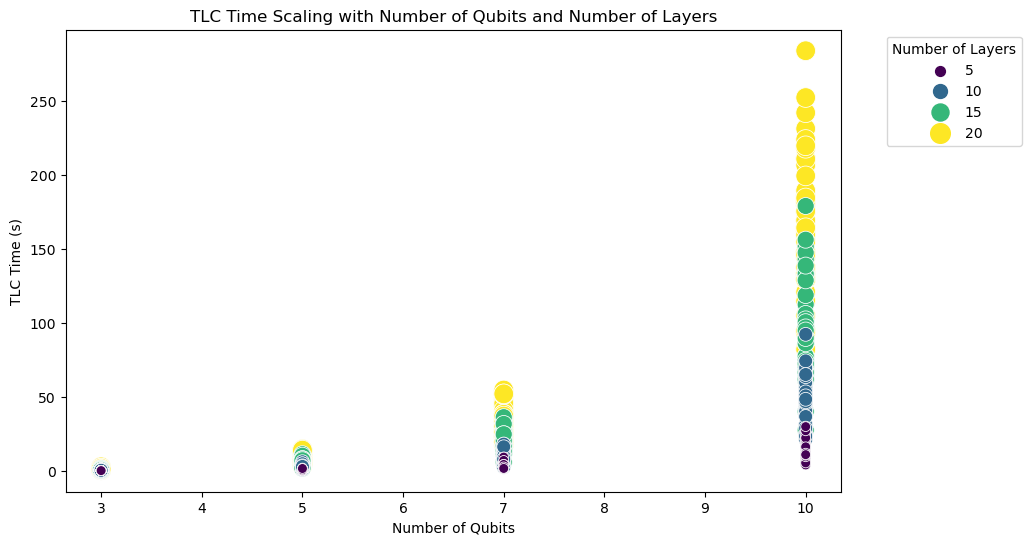

In [71]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=random_custom, x='Num_Qubits', y='TLC_Time', hue='Num_Layers', palette='viridis', size='Num_Layers', sizes=(50, 200))

# Set plot labels and title
plt.xlabel('Number of Qubits')
plt.ylabel('TLC Time (s)')
plt.title('TLC Time Scaling with Number of Qubits and Number of Layers')

# Show the legend
plt.legend(title='Number of Layers', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


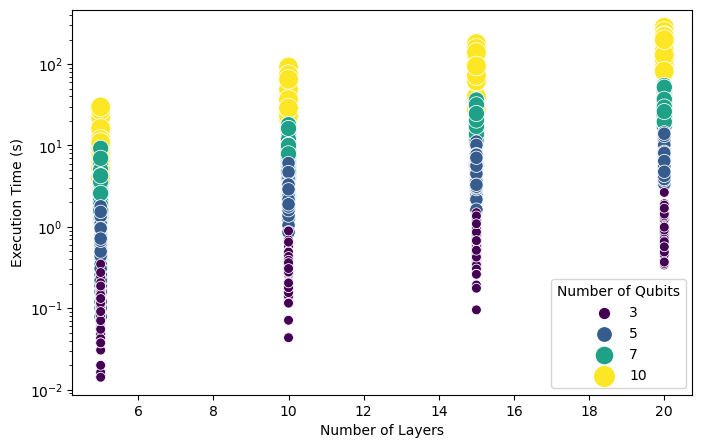

In [72]:
# Scatter plot for Time vs Layers
plt.figure(figsize=(8, 5))
sns.scatterplot(data=random_custom, x='Num_Layers', y='TLC_Time', hue='Num_Qubits', palette='viridis', size='Num_Qubits', sizes=(50, 200))
plt.xlabel('Number of Layers')
plt.ylabel('Execution Time (s)')
plt.legend(title='Number of Qubits', loc='lower right')
plt.yscale('log')
plt.show()


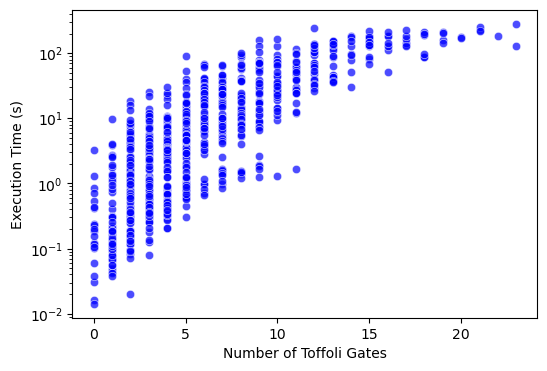

In [73]:
# Scatter plot for TLC_Time vs Original_CCX
plt.figure(figsize=(6, 4))
sns.scatterplot(data=random_custom, x='Original_CCX', y='TLC_Time', color='blue', alpha=0.7)
plt.xlabel('Number of Toffoli Gates')
plt.ylabel('Execution Time (s)')
plt.yscale('log')
plt.show()


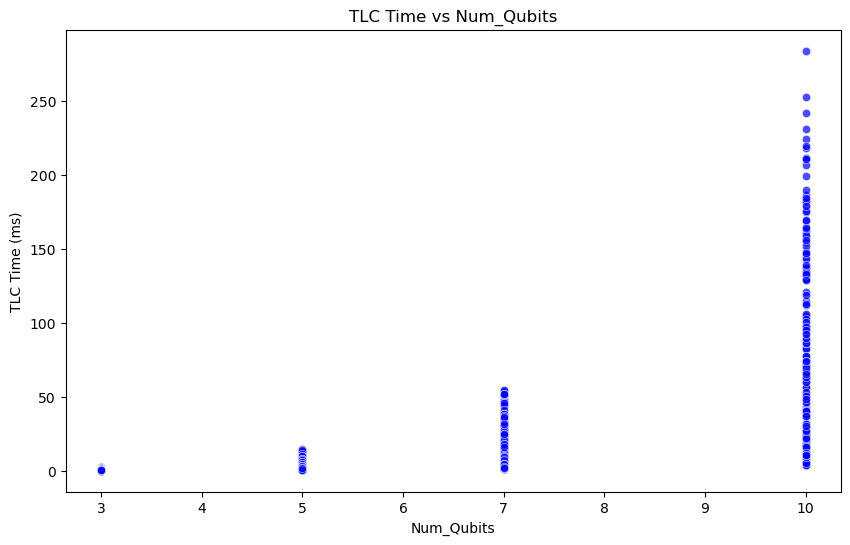

In [74]:
# Scatter plot for TLC_Time vs Num_Qubits
plt.figure(figsize=(10, 6))
sns.scatterplot(data=random_custom, x='Num_Qubits', y='TLC_Time', color='blue', alpha=0.7)
plt.xlabel('Num_Qubits')
plt.ylabel('TLC Time (ms)')
plt.title('TLC Time vs Num_Qubits')
plt.show()


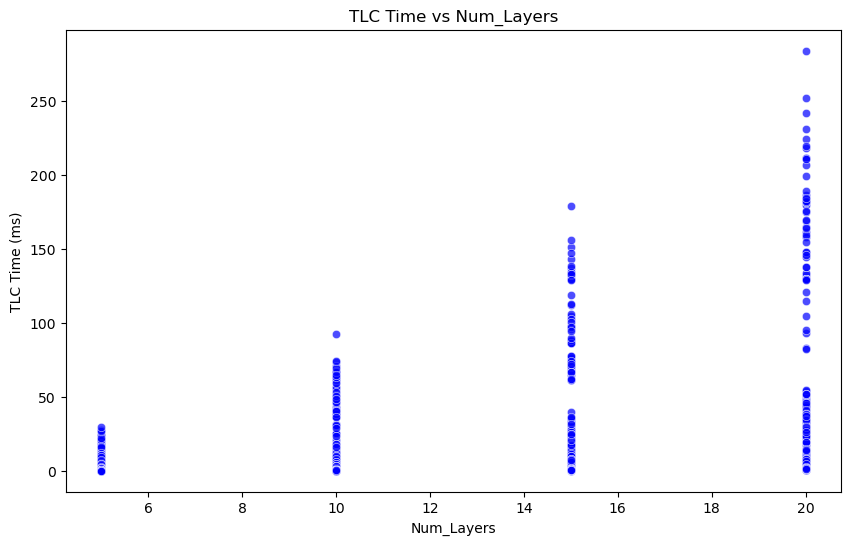

In [75]:
# Scatter plot for TLC_Time vs Num_Layers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=random_custom, x='Num_Layers', y='TLC_Time', color='blue', alpha=0.7)
plt.xlabel('Num_Layers')
plt.ylabel('TLC Time (ms)')
plt.title('TLC Time vs Num_Layers')
plt.show()


## Hardware tests

In [76]:
# Count the number of rows where random_3['TLC_Cost'] > random_custom['TLC_Cost']
count_rows = (random_custom['L3_Cost'] < random_custom['TLC_Cost']).sum()

# Create a boolean mask
mask = random_custom['L3_Cost'] > random_custom['TLC_Cost']

# Filter rows based on the mask
filtered_rows = random_custom[mask]

# Calculate the average L3_Cost and TLC_Cost for the filtered rows
average_L3_Cost = filtered_rows['L3_Cost'].mean()
average_TLC_Cost = filtered_rows['TLC_Cost'].mean()

print(f"Average L3_Cost for rows where L3_Cost > TLC_Cost: {average_L3_Cost}")
print(f"Average TLC_Cost for rows where L3_Cost > TLC_Cost: {average_TLC_Cost}")


Average L3_Cost for rows where L3_Cost > TLC_Cost: 193.61567164179104
Average TLC_Cost for rows where L3_Cost > TLC_Cost: 188.13619402985074


## Statistical tests

In [77]:
# For non_ccx circuits
l2 = non_ccx_2['L2_Time'].to_numpy()
l3 = non_ccx_2['L3_Time'].to_numpy()
tlc2 = non_ccx_2['TLC_Time'].to_numpy()
tlc3 = non_ccx_3['TLC_Time'].to_numpy()
tlccustom = non_ccx_custom['TLC_Time'].to_numpy()

combs = combinations([('l2', l2), ('l3', l3), ('tlc2', tlc2), ('tlc3', tlc3), ('tlccustom', tlccustom)], 2)

columns = ['Comparison', 'Statistic', 'P-value']
data = []

for (label_x, data_x), (label_y, data_y) in combs:
    result = mannwhitneyu(data_x, data_y)
    data.append([f'{label_x} vs {label_y}', result.statistic, result.pvalue])

df_results = pd.DataFrame(data, columns=columns)
pd.set_option("display.precision", 2) 
display(df_results)

,Comparison,Statistic,P-value
0,l2 vs l3,1.03e+04,0.00e+00
1,l2 vs tlc2,0.00e+00,0.00e+00
2,l2 vs tlc3,0.00e+00,0.00e+00
3,l2 vs tlccustom,0.00e+00,0.00e+00
4,l3 vs tlc2,5.04e+02,0.00e+00
5,l3 vs tlc3,7.35e+02,0.00e+00
6,l3 vs tlccustom,4.68e+02,0.00e+00
7,tlc2 vs tlc3,9.80e+06,3.81e-04
8,tlc2 vs tlccustom,9.19e+06,1.02e-01
9,tlc3 vs tlccustom,8.81e+06,7.85e-07


In [78]:
# For ccx circuits
l2 = ccx_2['L2_Time'].to_numpy()
l3 = ccx_2['L3_Time'].to_numpy()
tlc2 = ccx_2['TLC_Time'].to_numpy()
tlc3 = ccx_3['TLC_Time'].to_numpy()
tlccustom = ccx_custom['TLC_Time'].to_numpy()

combs = combinations([('l2', l2), ('l3', l3), ('tlc2', tlc2), ('tlc3', tlc3), ('tlccustom', tlccustom)], 2)

columns = ['Comparison', 'Statistic', 'P-value']
data = []

for (label_x, data_x), (label_y, data_y) in combs:
    result = mannwhitneyu(data_x, data_y)
    data.append([f'{label_x} vs {label_y}', result.statistic, result.pvalue])

df_results = pd.DataFrame(data, columns=columns)
pd.set_option("display.precision", 2) 
display(df_results)

,Comparison,Statistic,P-value
0,l2 vs l3,0.0,0.00e+00
1,l2 vs tlc2,0.0,0.00e+00
2,l2 vs tlc3,0.0,0.00e+00
3,l2 vs tlccustom,0.0,0.00e+00
4,l3 vs tlc2,255.0,0.00e+00
5,l3 vs tlc3,30.0,0.00e+00
6,l3 vs tlccustom,0.0,0.00e+00
7,tlc2 vs tlc3,321039.0,2.10e-241
8,tlc2 vs tlccustom,60873.0,0.00e+00
9,tlc3 vs tlccustom,758380.5,2.47e-46


In [79]:
# For random circuits
l2 = non_ccx_random_2['L2_Time'].to_numpy()
l3 = non_ccx_random_2['L3_Time'].to_numpy()
tlc2 = non_ccx_random_2['TLC_Time'].to_numpy()
tlc3 = non_ccx_random_3['TLC_Time'].to_numpy()
tlccustom = non_ccx_random_custom['TLC_Time'].to_numpy()

combs = combinations([('l2', l2), ('l3', l3), ('tlc2', tlc2), ('tlc3', tlc3), ('tlccustom', tlccustom)], 2)

columns = ['Comparison', 'Statistic', 'P-value']
data = []

for (label_x, data_x), (label_y, data_y) in combs:
    result = mannwhitneyu(data_x, data_y)
    data.append([f'{label_x} vs {label_y}', result.statistic, result.pvalue])

df_results = pd.DataFrame(data, columns=columns)
pd.set_option("display.precision", 2) 
display(df_results)

,Comparison,Statistic,P-value
0,l2 vs l3,16165.5,4.15e-237
1,l2 vs tlc2,0.0,8.89e-263
2,l2 vs tlc3,0.0,8.89e-263
3,l2 vs tlccustom,0.0,8.89e-263
4,l3 vs tlc2,0.0,8.89e-263
5,l3 vs tlc3,0.0,8.89e-263
6,l3 vs tlccustom,0.0,8.89e-263
7,tlc2 vs tlc3,330484.0,2.57e-01
8,tlc2 vs tlccustom,332370.0,1.81e-01
9,tlc3 vs tlccustom,321960.5,8.32e-01


In [80]:
tlc2_matched = random_2[random_2['Template_Matched'] == True]
tlc3_matched = random_3[random_3['Template_Matched'] == True]
tlccustom_matched = random_custom[random_custom['Template_Matched'] == True]

In [81]:
display(tlc2_matched.shape)
display(tlc3_matched.shape)
display(tlccustom_matched.shape)

(143, 35)

(62, 35)

(63, 35)

In [82]:
143/800

0.17875

In [83]:
62/800

0.0775

In [84]:
indices_condition = (non_ccx_custom['TLC_Cost'] == 0) & (non_ccx_custom['L3_Cost'] != 0)
filtered_indices = non_ccx_custom.index[indices_condition].tolist()

print("Indices where TLC_Cost is equal to 0 and L3_Cost is not equal to 0:", filtered_indices)

Indices where TLC_Cost is equal to 0 and L3_Cost is not equal to 0: [3143, 3351, 3639, 3847, 4021, 4115]


In [85]:
random_custom['Cost_Difference'] = random_custom['Original_Cost'] - random_custom['TLC_Cost']

# Find the row index where the difference is the largest
max_diff_index = random_custom['Cost_Difference'].idxmax()

# Get the values for 'Original_Cost' and 'TLC_Cost' at that row
max_diff_values = random_custom.loc[max_diff_index, ['Original_Cost', 'TLC_Cost']]

# Print the values
print(f"Row with the largest difference: {max_diff_values}")

Row with the largest difference: Original_Cost    544
TLC_Cost         289
Name: 12, dtype: object


In [86]:
ccx_2.columns

Index(['Original_X', 'L2_X', 'L3_X', 'TLC_X', 'Original_CX', 'L2_CX', 'L3_CX',
       'TLC_CX', 'Original_Layers', 'L2_Layers', 'L3_Layers', 'TLC_Layers',
       'L2_Time', 'L3_Time', 'TLC_Time', 'Original_Cost', 'L2_Cost', 'L3_Cost',
       'TLC_Cost', 'L3_Unitary', 'TLC_Unitary', 'L3_Unitary_X',
       'TLC_Unitary_X', 'L3_Unitary_CX', 'TLC_Unitary_CX', 'L3_Unitary_CCX',
       'TLC_Unitary_CCX', 'Template_Matched', 'Template_Matching_Time',
       'Template_Substitution_Time', 'Optimization_Pass_Time'],
      dtype='object')

In [87]:
index_of_sevens = ccx_2.loc[(ccx_2['TLC_Cost'] - ccx_2['L3_Cost']) < 0].index

print(len(index_of_sevens))

958


In [88]:
2064 + 958

3022

In [89]:
orig = random_custom.loc[12, 'Original_Cost']
tlc = random_custom.loc[12, 'TLC_Cost']

print(orig)
print(tlc)

544
289


In [90]:
display(non_ccx_random_2.describe()['TLC_Cost'])
display(non_ccx_random_2.describe()['L3_Cost'])

count    800.00
mean      39.46
std       24.31
min        3.00
25%       20.00
50%       33.00
75%       55.00
max      112.00
Name: TLC_Cost, dtype: float64

count    800.00
mean      41.58
std       25.87
min        4.00
25%       21.00
50%       35.00
75%       57.00
max      117.00
Name: L3_Cost, dtype: float64

In [91]:
display(non_ccx_random_custom.describe()['TLC_Cost'])

count    800.00
mean      39.44
std       24.33
min        3.00
25%       20.00
50%       34.00
75%       54.00
max      112.00
Name: TLC_Cost, dtype: float64

In [92]:
new_df['TLC_2'] = ccx_2['TLC_Cost'] - ccx_2['Original_Cost']
new_df['TLC_3'] = ccx_3['TLC_Cost'] - ccx_2['Original_Cost']
new_df['TLC_3(-US)'] = ccx_custom['TLC_Cost'] - ccx_2['Original_Cost']

new_df['L2'] = ccx_2['L2_Cost'] - ccx_2['Original_Cost']
new_df['L3'] = ccx_2['L2_Cost'] - ccx_2['Original_Cost']

In [93]:
new_df['TLC_2'] = non_ccx_2['TLC_Cost'] - non_ccx_2['Original_Cost']
new_df['TLC_3'] = non_ccx_3['TLC_Cost'] - non_ccx_2['Original_Cost']
new_df['TLC_3(-US)'] = non_ccx_custom['TLC_Cost'] - non_ccx_2['Original_Cost']

new_df['L2'] = non_ccx_2['L2_Cost'] - non_ccx_2['Original_Cost']
new_df['L3'] = non_ccx_2['L3_Cost'] - non_ccx_2['Original_Cost']

In [94]:
new_df['TLC_2'] = random_2['TLC_Cost'] - random_2['Original_Cost']
new_df['TLC_3'] = random_3['TLC_Cost'] - random_2['Original_Cost']
new_df['TLC_3(-US)'] = random_custom['TLC_Cost'] - random_2['Original_Cost']

new_df['L2'] = random_2['L2_Cost'] - random_2['Original_Cost']
new_df['L3'] = random_2['L3_Cost'] - random_2['Original_Cost']

In [95]:
new_df['TLC_2'] = non_ccx_random_2['TLC_Cost']
new_df['TLC_3'] = non_ccx_random_3['TLC_Cost']
new_df['TLC_3(-US)'] = non_ccx_random_custom['TLC_Cost']

new_df['L2'] = non_ccx_random_2['L2_Cost']
new_df['L3'] = non_ccx_random_2['L3_Cost']

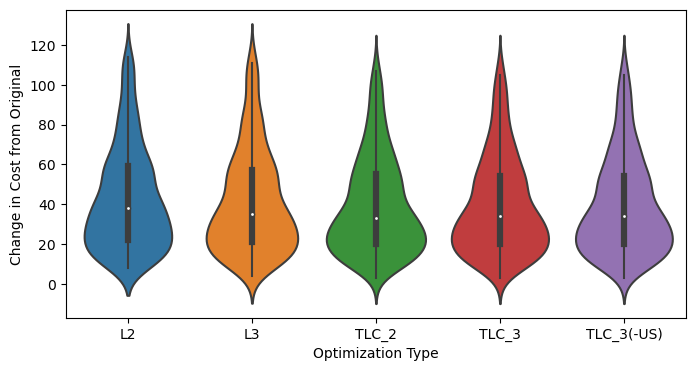

In [96]:
selected_columns = ['L2', 'L3', 'TLC_2', 'TLC_3', 'TLC_3(-US)']
data_for_violin = new_df[selected_columns]
plt.figure(figsize=(8, 4))

sns.violinplot(data=data_for_violin)

plt.xlabel("Optimization Type")
plt.ylabel("Change in Cost from Original")
plt.show()

In [97]:
display(non_ccx_random_2.describe()['TLC_Cost'])
display(non_ccx_random_3.describe()['TLC_Cost'])
display(non_ccx_random_custom.describe()['TLC_Cost'])

count    800.00
mean      39.46
std       24.31
min        3.00
25%       20.00
50%       33.00
75%       55.00
max      112.00
Name: TLC_Cost, dtype: float64

count    800.00
mean      39.55
std       24.33
min        3.00
25%       20.00
50%       34.00
75%       54.00
max      112.00
Name: TLC_Cost, dtype: float64

count    800.00
mean      39.44
std       24.33
min        3.00
25%       20.00
50%       34.00
75%       54.00
max      112.00
Name: TLC_Cost, dtype: float64

In [98]:
display(non_ccx_random_2.describe()['L3_Cost'])

count    800.00
mean      41.58
std       25.87
min        4.00
25%       21.00
50%       35.00
75%       57.00
max      117.00
Name: L3_Cost, dtype: float64

In [99]:
non_ccx_random_custom[['Template_Matching_Time', 'Template_Substitution_Time', 'Optimization_Pass_Time']].describe()
print(7.97 / (7.97 + 0.0044 + 0.0105))

0.9981339778832545


In [100]:
filtered_df = non_ccx_random_custom[non_ccx_random_custom['Template_Matched']]
print(filtered_df.shape)
mean_tlc_cost = filtered_df['TLC_Cost'].mean()
mean_l3_cost = filtered_df['L3_Cost'].mean()

print("Mean TLC_Cost where TLC_Cost < L3_Cost:", mean_tlc_cost)
print("Mean L3_Cost where TLC_Cost < L3_Cost:", mean_l3_cost)
print(351/800)

(351, 35)
Mean TLC_Cost where TLC_Cost < L3_Cost: 53.82051282051282
Mean L3_Cost where TLC_Cost < L3_Cost: 58.22222222222222
0.43875


In [101]:
filtered_df = non_ccx_random_2[non_ccx_random_2['Template_Matched']]
print(filtered_df.shape[0]/800)
filtered_df = non_ccx_random_3[non_ccx_random_3['Template_Matched']]
print(filtered_df.shape[0]/800)
filtered_df = non_ccx_random_custom[non_ccx_random_custom['Template_Matched']]
print(filtered_df.shape[0]/800)

0.48125
0.43875
0.43875
